In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv


#### Reading the dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv')

In [5]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

#### Counting the target categories

In [6]:
df.fraud_bool.value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [8]:
df.shape

(1000000, 32)

#### Different types of columns have been seperated for ease of use

In [9]:
target_columns = ['fraud_bool']

numeric_columns = ['income','name_email_similarity','prev_address_months_count','current_address_months_count',\
                   'customer_age','days_since_request','intended_balcon_amount','zip_count_4w','velocity_6h',\
                    'velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w',\
                  'credit_risk_score','bank_months_count','proposed_credit_limit','session_length_in_minutes',\
                   'device_distinct_emails_8w','device_fraud_count','month']
binary_columns = ['email_is_free','phone_home_valid','phone_mobile_valid','has_other_cards','foreign_request',\
                 'keep_alive_session']
categorical_columns = ['payment_type','employment_status','housing_status','source','device_os']

In [12]:
len(binary_columns)

6

#### Columns after features have been chosen

In [5]:
target_columns = ['fraud_bool']


numeric_columns = ['income','name_email_similarity','current_address_months_count',\
                   'customer_age','days_since_request','zip_count_4w','velocity_6h',\
                    'velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w',\
                  'credit_risk_score','proposed_credit_limit','session_length_in_minutes',\
                   'device_distinct_emails_8w','device_fraud_count']
binary_columns = ['email_is_free','phone_home_valid','phone_mobile_valid','has_other_cards','foreign_request',\
                 'keep_alive_session']
categorical_columns = ['payment_type','employment_status','housing_status','source','device_os']

In [7]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(df, prefix=categorical_columns))

In [6]:
## Min MAX Scaling
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_columns)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
new_df_scaled = preprocessor.fit_transform(new_df)

In [9]:
# Convert the scaled training and testing sets to pandas DataFrames
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df.columns)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
X = new_df_scaled.drop(['fraud_bool'],axis=1)
y = new_df_scaled[['fraud_bool']].astype('int')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Logistic Regression CV

In [43]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
y_pred = clf.predict(X_test)

In [47]:
clf.score(X_test, y_test)

0.7791366666666667

In [62]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve,accuracy_score

In [63]:
print(accuracy_score(y_test,y_pred))

0.7791366666666667


In [61]:
print(confusion_matrix(y_test,y_pred))

[[231579   2090]
 [ 64169   2162]]


In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87    295748
           1       0.03      0.51      0.06      4252

    accuracy                           0.78    300000
   macro avg       0.51      0.65      0.47    300000
weighted avg       0.98      0.78      0.86    300000



In [13]:
import matplotlib.pyplot as plt


In [59]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)

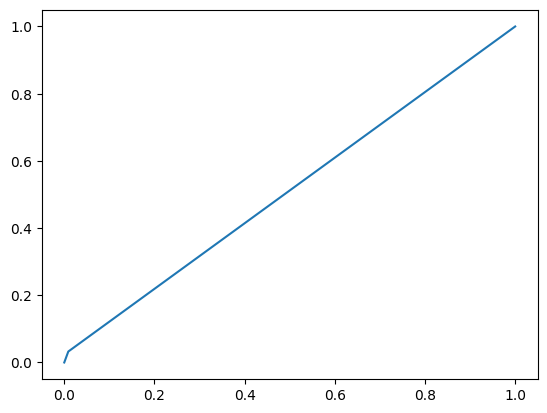

## Feature Engineering to increase model performance

In [9]:
# All columns counts less than 0
res = df[df[numeric_columns] < 0 ].count()

In [10]:
res

fraud_bool                              0
income                                  0
name_email_similarity                   0
prev_address_months_count               0
current_address_months_count         4254
customer_age                            0
days_since_request                      0
intended_balcon_amount                  0
payment_type                            0
zip_count_4w                            0
velocity_6h                            44
velocity_24h                            0
velocity_4w                             0
bank_branch_count_8w                    0
date_of_birth_distinct_emails_4w        0
employment_status                       0
credit_risk_score                   14445
email_is_free                           0
housing_status                          0
phone_home_valid                        0
phone_mobile_valid                      0
bank_months_count                       0
has_other_cards                         0
proposed_credit_limit             

In [70]:
## Deleting columns with high null values indicated by -1

df.drop(['prev_address_months_count','intended_balcon_amount','bank_months_count' ],axis=1,inplace=True)

In [14]:
import seaborn as sns

In [15]:
df[numeric_columns].corr()

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count
income,1.000000,-0.038519,-0.036985,0.125822,-0.015877,-0.080581,-0.096431,-0.101269,-0.106333,0.007474,-0.062348,0.171447,0.108868,-0.055430,-0.009992,NaN
name_email_similarity,-0.038519,1.000000,0.050305,-0.048902,-0.007736,0.025114,0.024881,0.035221,0.039968,-0.001470,0.022994,0.049126,0.073159,0.005998,-0.017804,NaN
current_address_months_count,-0.036985,0.050305,1.000000,0.142863,-0.057836,0.047286,0.027508,0.018753,0.026172,0.054202,-0.174714,0.094976,0.130594,-0.033574,-0.000760,NaN
customer_age,0.125822,-0.048902,0.142863,1.000000,-0.035999,-0.014176,-0.022063,-0.010030,-0.004303,0.048412,-0.420173,0.166094,0.148857,0.025049,0.025709,NaN
days_since_request,-0.015877,-0.007736,-0.057836,-0.035999,1.000000,0.000249,0.027968,0.023869,0.017706,-0.018173,0.018731,-0.088141,-0.068670,0.049613,0.009025,NaN
zip_count_4w,-0.080581,0.025114,0.047286,-0.014176,0.000249,1.000000,0.142372,0.201186,0.302955,0.005958,0.126885,-0.102645,-0.011651,0.039687,0.020550,NaN
velocity_6h,-0.096431,0.024881,0.027508,-0.022063,0.027968,0.142372,1.000000,0.464003,0.400254,0.020140,0.118752,-0.145254,-0.025005,0.054491,0.030030,NaN
velocity_24h,-0.101269,0.035221,0.018753,-0.010030,0.023869,0.201186,0.464003,1.000000,0.539115,0.036062,0.155434,-0.146770,0.017725,0.066875,0.034981,NaN
velocity_4w,-0.106333,0.039968,0.026172,-0.004303,0.017706,0.302955,0.400254,0.539115,1.000000,0.031267,0.242365,-0.168766,0.052440,0.079005,0.042320,NaN
bank_branch_count_8w,0.007474,-0.001470,0.054202,0.048412,-0.018173,0.005958,0.020140,0.036062,0.031267,1.000000,-0.036952,-0.014569,0.009072,0.004887,0.003697,NaN


In [78]:
## Velocity_6W is highly inversely corelated with month. Choosing to remove month
df.drop(['month'],axis=1,inplace=True)

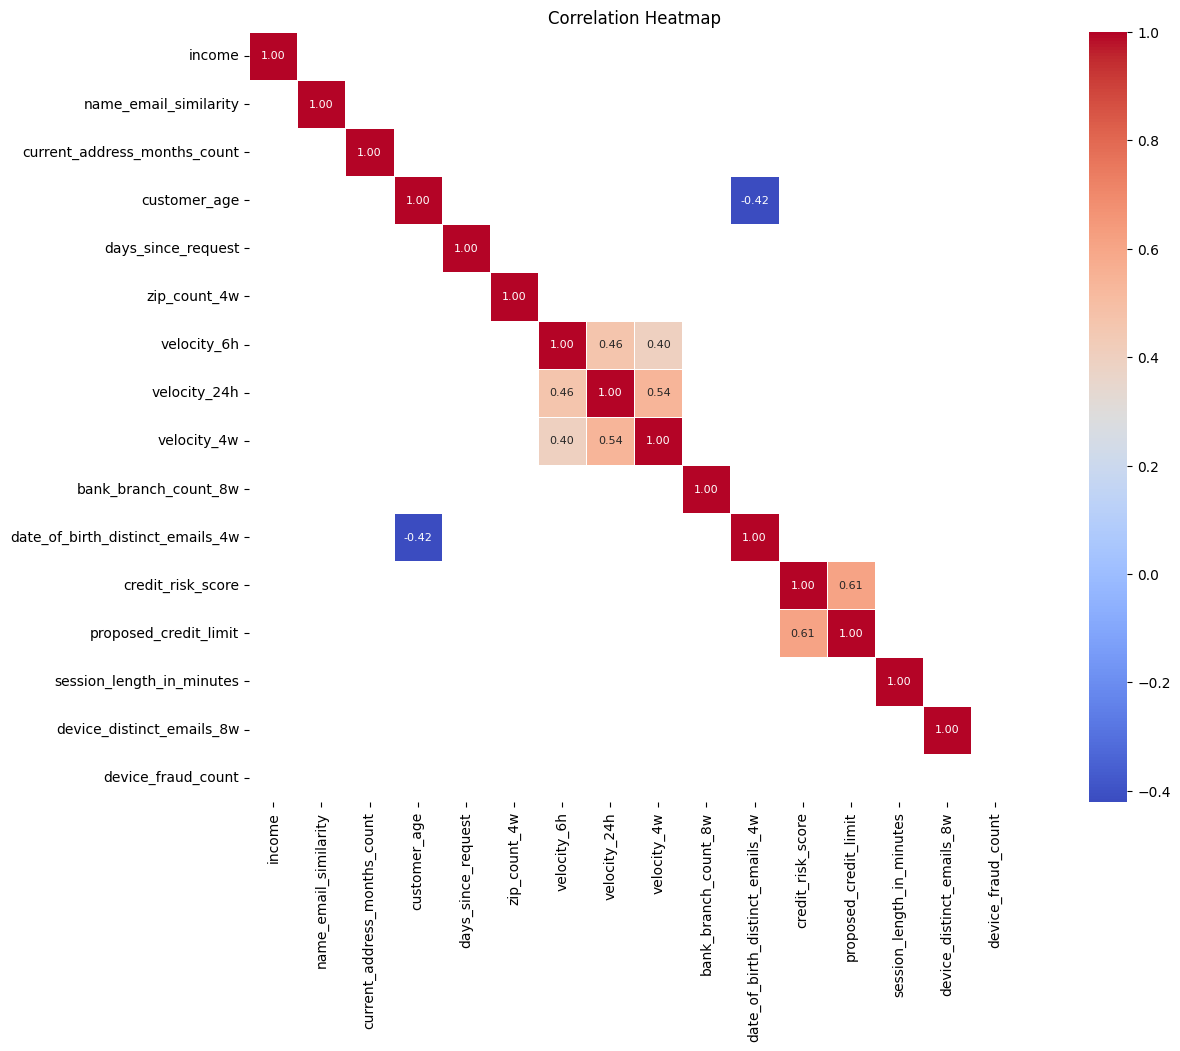

In [81]:
# Compute correlation matrix
df_corr = df[numeric_columns].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_corr[(df_corr >= 0.4) | (df_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

In [16]:
X = new_df.drop(['fraud_bool'],axis=1)
y = new_df[['fraud_bool']].astype('int')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(df, prefix=categorical_columns))

In [13]:
categorical_columns

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [22]:
X.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month',
       'payment_type_AA', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CA',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
       'housing_sta

In [20]:
## Test for categorical values - Chi Squared
from sklearn.feature_selection import chi2

chi2_results = chi2(X[['payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BA',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'source_INTERNET', 'source_TELEAPP', 'device_os_linux',
       'device_os_macintosh', 'device_os_other', 'device_os_windows',
       'device_os_x11']], y)



In [21]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': ['payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BA',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'source_INTERNET', 'source_TELEAPP', 'device_os_linux',
       'device_os_macintosh', 'device_os_other', 'device_os_windows',
       'device_os_x11'], 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
my_palette = sns.color_palette("husl", 2)

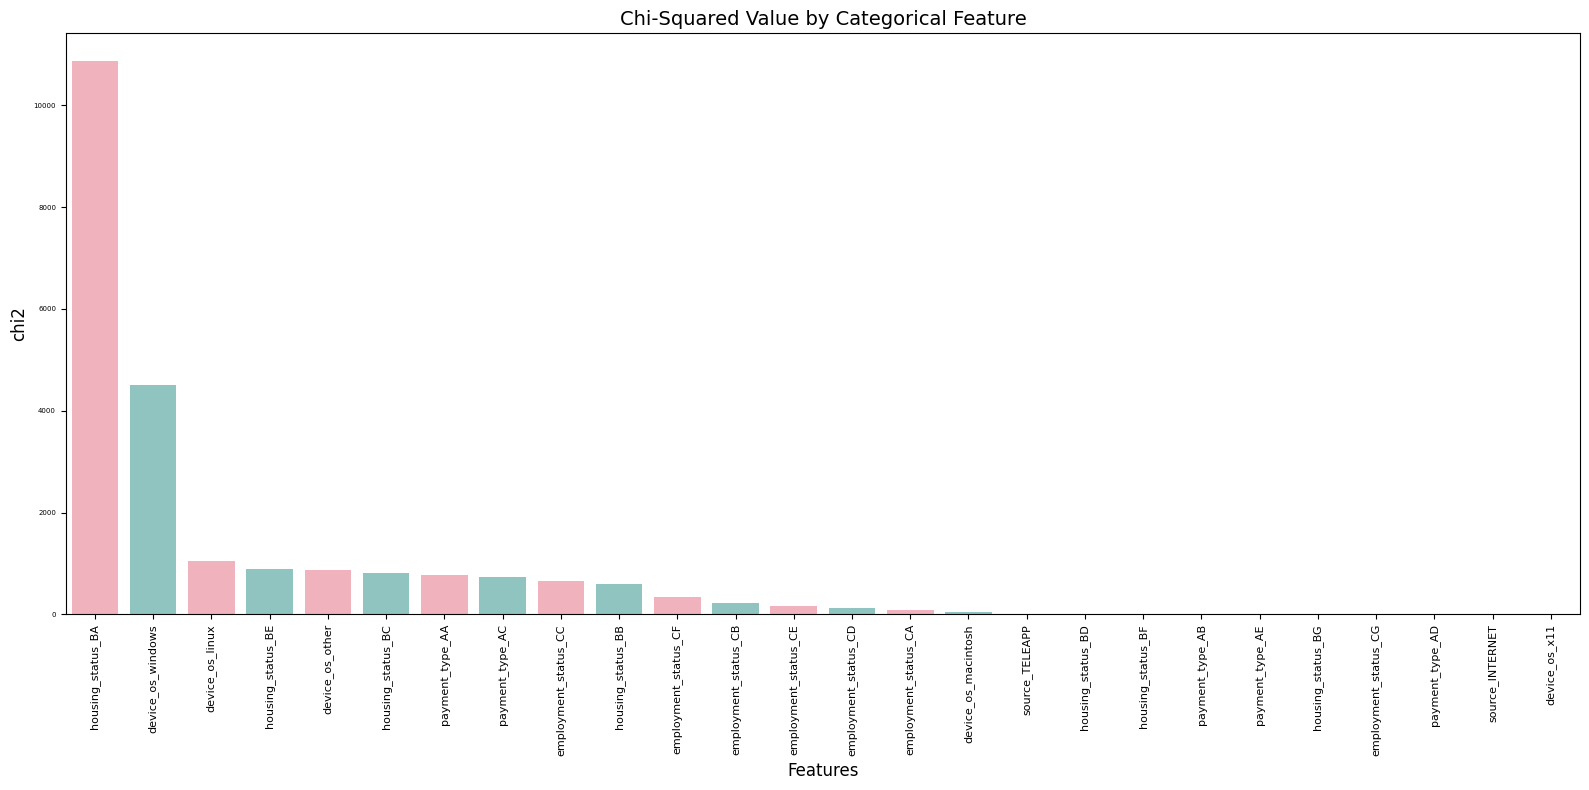

In [24]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
X_train_cat = X[['payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BA',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'source_INTERNET', 'source_TELEAPP', 'device_os_linux',
       'device_os_macintosh', 'device_os_other', 'device_os_windows',
       'device_os_x11']]
y_train_cat = y[['fraud_bool']]

In [27]:
## Select the top 5 most influential categorical variables
from sklearn.feature_selection import SelectKBest

# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)



SelectKBest(k=15, score_func=<function chi2 at 0x7dbfd0d97640>)

In [28]:
# Get the names of the top 5 features
best_chi2_features = X_train_cat.columns[best_chi2_cols.get_support()]

# Print the names of the top 5 features
print(best_chi2_features.tolist())

['payment_type_AA', 'payment_type_AC', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BE', 'device_os_linux', 'device_os_other', 'device_os_windows']


In [29]:
best_cat_features = best_chi2_features.tolist()

In [30]:
columns_required = target_columns + numeric_columns + best_cat_features + binary_columns

In [31]:
new_df = new_df[columns_required]

In [32]:
X = new_df.drop(['fraud_bool'],axis=1)
y = new_df[['fraud_bool']].astype('int')

In [34]:
### Due to imbalanced data set , it has to be balanced - SMOTE is used 

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

In [39]:
y.fraud_bool.value_counts()

fraud_bool
0    988971
1    988971
Name: count, dtype: int64

In [41]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_columns)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
new_df_scaled = preprocessor.fit_transform(X)

In [43]:
# Convert the scaled training and testing sets to pandas DataFrames
new_df_scaled = pd.DataFrame(new_df_scaled, columns=X.columns)

In [44]:
X = np.asarray(new_df_scaled).astype(np.float32)
y = np.asarray(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegressionCV

In [49]:
clf = LogisticRegressionCV(cv=2, random_state=0,max_iter=5,penalty = 'l2',n_jobs=4).fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

In [52]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve,accuracy_score

In [50]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9628991730467505

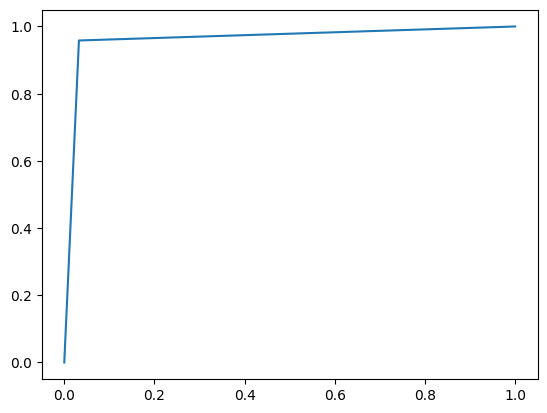

In [53]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    299654
           1       0.96      0.97      0.96    293729

    accuracy                           0.96    593383
   macro avg       0.96      0.96      0.96    593383
weighted avg       0.96      0.96      0.96    593383



In [55]:
print(confusion_matrix(y_test,y_pred))

[[287300   9661]
 [ 12354 284068]]


## Using Neural networks to classify

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [57]:
feature_dim = X_train.shape[1]
feature_dim

37

In [58]:
# Define the first CNN model
cnn_model_1 = Sequential()
cnn_model_1.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(feature_dim, 1)))
cnn_model_1.add(MaxPooling1D(pool_size=2))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(16, activation='relu'))
cnn_model_1.add(Dense(1, activation='sigmoid'))

In [59]:
# Compile all models
cnn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
cnn_model_1.fit(X_train, y_train, epochs=15, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/15
1385/1385 [==============================] - 10s 4ms/step - loss: 0.1430 - accuracy: 0.9471 - val_loss: 0.1019 - val_accuracy: 0.9626
Epoch 2/15
1385/1385 [==============================] - 6s 4ms/step - loss: 0.0992 - accuracy: 0.9633 - val_loss: 0.0961 - val_accuracy: 0.9642
Epoch 3/15
1385/1385 [==============================] - 6s 4ms/step - loss: 0.0949 - accuracy: 0.9646 - val_loss: 0.0928 - val_accuracy: 0.9653
Epoch 4/15
1385/1385 [==============================] - 6s 4ms/step - loss: 0.0925 - accuracy: 0.9652 - val_loss: 0.0911 - val_accuracy: 0.9657
Epoch 5/15
1385/1385 [==============================] - 6s 4ms/step - loss: 0.0911 - accuracy: 0.9658 - val_loss: 0.0910 - val_accuracy: 0.9657
Epoch 6/15
1385/1385 [==============================] - 6s 4ms/step - loss: 0.0903 - accuracy: 0.9661 - val_loss: 0.0895 - val_accuracy: 0.9664
Epoch 7/15
1385/1385 [==============================] - 6s 4ms/step - loss: 0.0896 - accuracy: 0.9663 - val_loss: 0.0896 - val_accuracy

In [61]:
# Make predictions with the neural network model
cnn_predictions_1 = cnn_model_1.predict(X_test)

18544/18544 [==============================] - 29s 2ms/step


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [63]:
## Evaluating the network
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_true=y_test, y_pred=y_pred)
    recall = recall_score(y_true=y_test, y_pred=y_pred)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Accuracy: ", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)

In [64]:
y_test_list = y_test.tolist()

In [65]:
np.count_nonzero(y_test)

296422

In [66]:
cnn_predictions_1

array([[8.33631773e-03],
       [1.07723195e-02],
       [6.42176077e-04],
       ...,
       [2.12645121e-02],
       [1.15835249e-01],
       [9.97853935e-01]], dtype=float32)

In [67]:
evaluate(y_test, np.round(cnn_predictions_1))

Accuracy:  0.9664820192017635
Precision: 0.9659720888223856
Recall: 0.966966014668277
F1 Score: 0.9664687962046635
Confusion Matrix:
 [[286864  10097]
 [  9792 286630]]


#### Did not perform well as by the looks of it everything got classified into 1 bucket - 0 even though there is high accuracy. - This is mainly due to imbalanced data  